<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [38]:
import time
import random
import numpy as np
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
random.seed(100)

In [3]:
# https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheSelectionSort.html

def selectionSort(alist):
    for fillslot in range(len(alist)-1,0,-1):
        positionOfMax=0 
        for location in range(1,fillslot+1):
            if alist[location]>alist[positionOfMax]:
                positionOfMax = location

        alist[fillslot], alist[positionOfMax] = alist[positionOfMax], alist[fillslot]

In [4]:
def insertionSort(alist):
    for index in range(1,len(alist)):
    
        currentvalue = alist[index]
        position = index

        while position>0 and alist[position-1]>currentvalue:
            alist[position]=alist[position-1]
            position = position-1

        alist[position]=currentvalue

In [5]:
# Adapted from https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheMergeSort.html?highlight=merge%20sort
# and https://www.geeksforgeeks.org/merge-sort/

def mergeSort(alist):
    # Base case - if list is 1 or less, it is sorted by default
    if len(alist) > 1:

        # Get midpoint of the list with integer division
        midpoint = len(alist) // 2
    
        # Splitting the list in half using the midpoint
        left_list = alist[:midpoint]
        right_list = alist[midpoint:]

        # Recursively split the left_list and right_list until the base case is reached
        mergeSort(left_list)
        mergeSort(right_list)
        # At the end of the recursion, all lists will contain a maximum of 1 element and thus be sorted.

        # Code below merges the smaller sorted lists into larger sorted lists
        l = 0 # Index value for left_list
        r = 0 # Index value for right_list
        a = 0 # Index value for alist

        # Compare left and right lists, merging smaller sorted lists to become larger sorted lists, eventually placing sorted elements back into alist
        while l < len(left_list) and r < len(right_list):
            if left_list[l] <= right_list[r]: # keeps algorithm stable, maintaining order of alist 
                alist[a] = left_list[l]
                l += 1
            else:
                alist[a] = right_list[r]
                r += 1
            a += 1

        # Some lists will not have a left/right counterpart and so will be dealt with below       
        while l < len(left_list):
            alist[a] = left_list[l]
            l += 1
            a += 1

        while r < len(right_list):
            alist[a] = right_list[r]
            r += 1
            a += 1
        # The original list has now been sorted

In [6]:
# https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheQuickSort.html?highlight=quicksort

def quickSort(alist):
    quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
    if first<last:

        splitpoint = partition(alist,first,last)

        quickSortHelper(alist,first,splitpoint-1)
        quickSortHelper(alist,splitpoint+1,last)


def partition(alist,first,last):
    pivotvalue = alist[first]

    leftmark = first+1
    rightmark = last

    done = False
    while not done:

        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp


    return rightmark


In [7]:
# Create an array of random integers of size n 
def random_array(n):

    array = []
    
    for i in range(0, n):
        array.append(random.randint(0, 100))
    
    return array


In [8]:
# Input sizes
n_size = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

In [9]:
def benchmarking(sorting_func):
    
    # Lists to contain the running times for each algorithm
    sort_times = []

    # Time test for each sorting algorithm
    for n in n_size:
        start_time = time.time()
        sorting_func(random_array(n))
        end_time = time.time()
        time_elapsed = round((end_time - start_time), 3)
        sort_times.append(time_elapsed)
    
    return sort_times

In [10]:
def averages(sort):
    
    times = []

    # Calculate benchmarking 10 times
    for i in range(0, 10):
        time = benchmarking(sort)
        times.append(time) 
    print(type(times))
    
    arr_times = np.array(times)
    
    averages = np.mean(arr_times, axis=0)
    
    return averages

In [11]:
quick = averages(quickSort)
print(quick)

<class 'list'>
[0.0004 0.0019 0.0038 0.0066 0.0099 0.0127 0.0261 0.0498 0.0689 0.0839
 0.1136 0.1428 0.1793]


In [12]:
insertion = averages(insertionSort)
print(insertion)

<class 'list'>
[9.00000e-04 6.80000e-03 2.97000e-02 7.32000e-02 1.24900e-01 1.97500e-01
 8.46600e-01 1.83960e+00 3.24010e+00 4.94530e+00 7.15890e+00 9.65380e+00
 1.29183e+01]


In [13]:
selection = averages(selectionSort)
print(selection)

<class 'list'>
[1.2000e-03 5.5000e-03 1.9400e-02 4.2400e-02 7.7000e-02 1.2120e-01
 5.2820e-01 1.0857e+00 2.0532e+00 3.3030e+00 4.6304e+00 6.3605e+00
 8.1097e+00]


In [14]:
merge = averages(mergeSort)
print(merge)

<class 'list'>
[0.0007 0.0027 0.0055 0.008  0.0126 0.0152 0.0325 0.0572 0.0781 0.0929
 0.119  0.143  0.1568]


In [49]:
algorithms = ['Insertion Sort', 'Selection Sort', 'Quick Sort', 'Merge Sort']

df = pd.DataFrame([insertion, selection, quick, merge], columns=['100', '250', '500', '750', '1000', '1250', '2500', '3750', '5000', '6250', '7500', '8750', '10000'])

In [50]:
df


,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
0,0.0009,0.0068,0.0297,0.0732,0.1249,0.1975,0.8466,1.8396,3.2401,4.9453,7.1589,9.6538,12.9183
1,0.0012,0.0055,0.0194,0.0424,0.0770,0.1212,0.5282,1.0857,2.0532,3.3030,4.6304,6.3605,8.1097
2,0.0004,0.0019,0.0038,0.0066,0.0099,0.0127,0.0261,0.0498,0.0689,0.0839,0.1136,0.1428,0.1793
3,0.0007,0.0027,0.0055,0.0080,0.0126,0.0152,0.0325,0.0572,0.0781,0.0929,0.1190,0.1430,0.1568


In [51]:
df.insert(0, "Algorithms - Size", algorithms)
df.set_index('Algorithms - Size')

,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
Algorithms - Size,,,,,,,,,,,,,
Insertion Sort,0.0009,0.0068,0.0297,0.0732,0.1249,0.1975,0.8466,1.8396,3.2401,4.9453,7.1589,9.6538,12.9183
Selection Sort,0.0012,0.0055,0.0194,0.0424,0.0770,0.1212,0.5282,1.0857,2.0532,3.3030,4.6304,6.3605,8.1097
Quick Sort,0.0004,0.0019,0.0038,0.0066,0.0099,0.0127,0.0261,0.0498,0.0689,0.0839,0.1136,0.1428,0.1793
Merge Sort,0.0007,0.0027,0.0055,0.0080,0.0126,0.0152,0.0325,0.0572,0.0781,0.0929,0.1190,0.1430,0.1568


In [52]:
df

,Algorithms - Size,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
0,Insertion Sort,0.0009,0.0068,0.0297,0.0732,0.1249,0.1975,0.8466,1.8396,3.2401,4.9453,7.1589,9.6538,12.9183
1,Selection Sort,0.0012,0.0055,0.0194,0.0424,0.0770,0.1212,0.5282,1.0857,2.0532,3.3030,4.6304,6.3605,8.1097
2,Quick Sort,0.0004,0.0019,0.0038,0.0066,0.0099,0.0127,0.0261,0.0498,0.0689,0.0839,0.1136,0.1428,0.1793
3,Merge Sort,0.0007,0.0027,0.0055,0.0080,0.0126,0.0152,0.0325,0.0572,0.0781,0.0929,0.1190,0.1430,0.1568


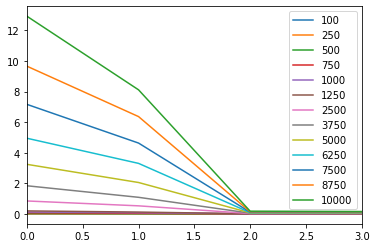

In [55]:
df.plot()

In [54]:
df.describe()

,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.000800,0.004225,0.014600,0.032550,0.056100,0.086650,0.358350,0.758075,1.360075,2.106275,3.005475,4.075025,5.341025
std,0.000337,0.002308,0.012254,0.031757,0.055368,0.089545,0.401582,0.869849,1.562638,2.424589,3.492182,4.735305,6.287561
min,0.000400,0.001900,0.003800,0.006600,0.009900,0.012700,0.026100,0.049800,0.068900,0.083900,0.113600,0.142800,0.156800
25%,0.000625,0.002500,0.005075,0.007650,0.011925,0.014575,0.030900,0.055350,0.075800,0.090650,0.117650,0.142950,0.173675
50%,0.000800,0.004100,0.012450,0.025200,0.044800,0.068200,0.280350,0.571450,1.065650,1.697950,2.374700,3.251750,4.144500
75%,0.000975,0.005825,0.021975,0.050100,0.088975,0.140275,0.607800,1.274175,2.349925,3.713575,5.262525,7.183825,9.311850
max,0.001200,0.006800,0.029700,0.073200,0.124900,0.197500,0.846600,1.839600,3.240100,4.945300,7.158900,9.653800,12.918300
